# Loss

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### MNIST

In [19]:
# Load the data
path = './output/'

# Load the data
loss_iwae_5 = pd.read_csv(path + 'train_loss_IWAE_layers_2_k_5.txt', header=None)
loss_iwae_50 = pd.read_csv(path + 'train_loss_IWAE_layers_2_k_50.txt', header=None)
loss_vae_1 = pd.read_csv(path + 'train_loss_VAE_layers_2_k_1.txt', header=None)
loss_vae_5 = pd.read_csv(path + 'train_loss_VAE_layers_2_k_5.txt', header=None)
# loss_vae_50 = pd.read_csv(path + 'train_loss_VAE_layers_2_k_50.txt', header=None)

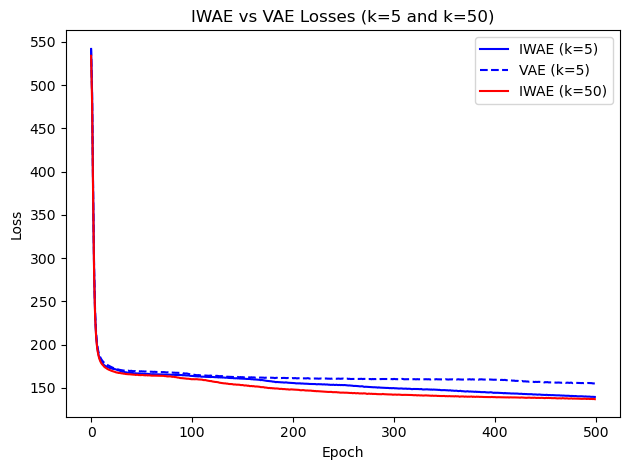

In [45]:
# Loss IWAE vs VAE k=5
# Plot IWAE and VAE losses for k=5 and k=50

plt.plot(np.arange(len(loss_iwae_5)), loss_iwae_5, label='IWAE (k=5)', linestyle='-', color='blue')

plt.plot(np.arange(len(loss_vae_5)), loss_vae_5, label='VAE (k=5)', linestyle='--', color='blue')

plt.plot(np.arange(len(loss_iwae_50)), loss_iwae_50, label='IWAE (k=50)', linestyle='-', color='red')

# plt.plot(np.arange(len(loss_vae_50)), loss_vae_50, label='VAE (k=50)', linestyle='--', color='red')



# Adding labels and legend

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('IWAE vs VAE Losses (k=5 and k=50)')

plt.legend()



# Adjust layout and show/save the plot

plt.tight_layout()

plt.savefig('loss_mnist.png')

plt.show()

### Omni

In [39]:
# Load the data
path = './output_omni/'

# Load the data
loss_iwae_5 = pd.read_csv(path + 'train_loss_IWAE_layers_2_k_5.txt', header=None)
loss_iwae_50 = pd.read_csv(path + 'train_loss_IWAE_layers_2_k_50.txt', header=None)
loss_vae_1 = pd.read_csv(path + 'train_loss_VAE_layers_2_k_1.txt', header=None)
loss_vae_5 = pd.read_csv(path + 'train_loss_VAE_layers_2_k_5.txt', header=None)
loss_vae_50 = pd.read_csv(path + 'train_loss_VAE_layers_2_k_50.txt', header=None)

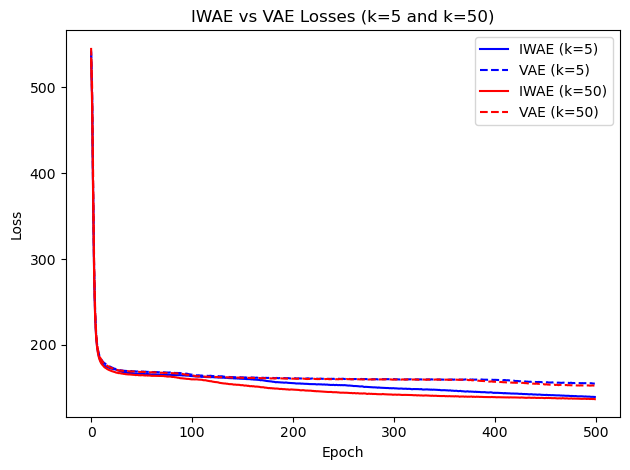

In [42]:
# Loss IWAE vs VAE k=5
plt.plot(np.arange(len(loss_iwae_5)), loss_iwae_5, label='IWAE (k=5)', linestyle='-', color='blue')

plt.plot(np.arange(len(loss_vae_5)), loss_vae_5, label='VAE (k=5)', linestyle='--', color='blue')

plt.plot(np.arange(len(loss_iwae_50)), loss_iwae_50, label='IWAE (k=50)', linestyle='-', color='red')

plt.plot(np.arange(len(loss_vae_50)), loss_vae_50, label='VAE (k=50)', linestyle='--', color='red')



# Adding labels and legend

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('IWAE vs VAE Losses (k=5 and k=50)')

plt.legend()



# Adjust layout and show/save the plot

plt.tight_layout()

plt.savefig('loss_omniglot.png')

plt.show()


## Reconstruction

In [23]:
import torch
from vae_models import *

### MNIST

In [31]:
with open('./data/data.pkl', 'rb') as file_handle:
    data = pickle.load(file_handle)
    
train_image = data['train_image']
train_label = data['train_label']
test_image = data['test_image']
test_label = data['test_label']

batch_size = 1
train_data = MNIST_Dataset(train_image)

train_data_loader_mnist = DataLoader(train_data, batch_size = batch_size, shuffle = True)

test_data = MNIST_Dataset(test_image)
test_data_loader_mnist = DataLoader(test_data, batch_size = batch_size)

In [43]:
# Load the model
iwae_5 = IWAE_2(100, 50, 784)
iwae_5.double().cuda()
iwae_5.load_state_dict(torch.load("./output/model/IWAE_layers_2_k_5.model"))

iwae_50 = IWAE_2(100, 50, 784)
iwae_50.double().cuda()
iwae_50.load_state_dict(torch.load("./output/model/IWAE_layers_2_k_50.model"))

vae_1 = IWAE_2(100, 50, 784)
vae_1.double().cuda()
vae_1.load_state_dict(torch.load("./output/model/VAE_layers_2_k_1.model"))

vae_5 = IWAE_2(100, 50, 784)
vae_5.double().cuda()
vae_5.load_state_dict(torch.load("./output/model/VAE_layers_2_k_5.model"))

# vae_50 = IWAE_2(100, 50, 784)
# vae_50.double().cuda()
# vae_50.load_state_dict(torch.load("./output/model/VAE_layers_2_k_50.model"))

/tmp/ipykernel_360477/1924868794.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  iwae_5.load_state_dict(torch.load("./output/model/IWAE_layers_2_k_5.model"))
/tmp/ipyker

<All keys matched successfully>

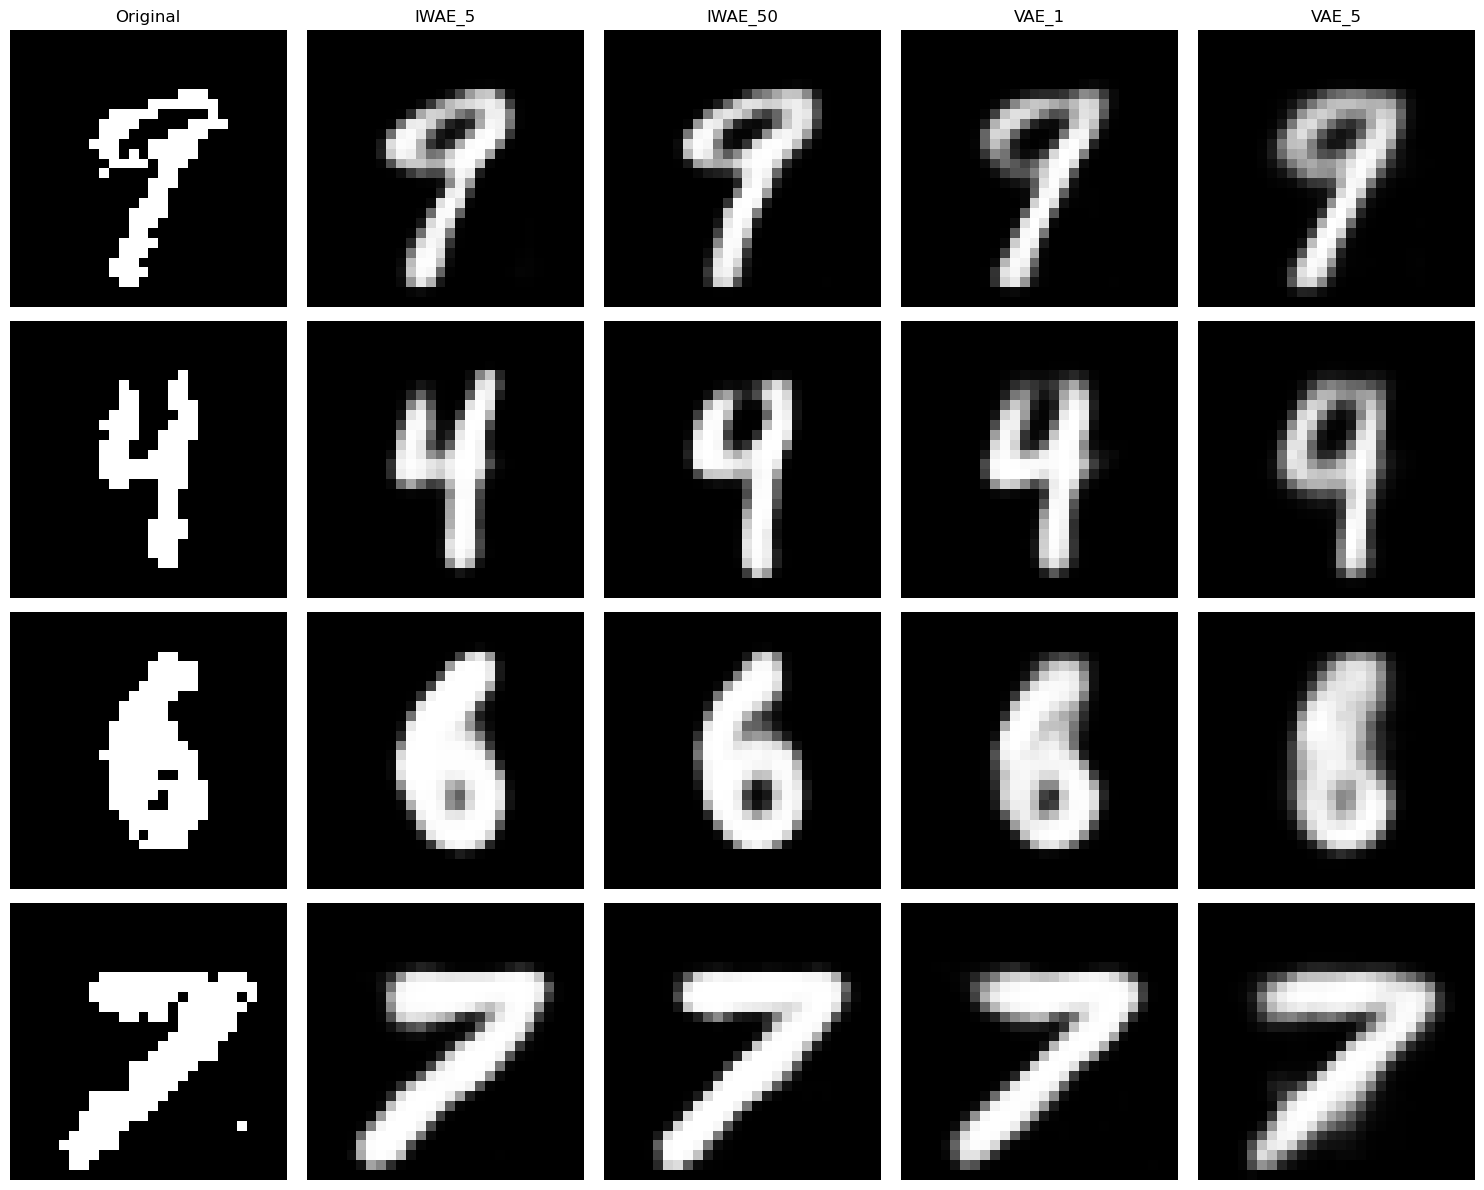

In [ ]:
models = {
    "Original": None,  # Placeholder for the original sample
    "IWAE_5": iwae_5,
    "IWAE_50": iwae_50,
    "VAE_1": vae_1,
    "VAE_5": vae_5,
    # "VAE_50": vae_50
}

# Take 4 samples from the dataset
samples = [next(iter(train_data_loader_mnist))[0] for _ in range(4)]

# Move samples to GPU and double precision
samples = [sample.cuda().double() for sample in samples]

# Create a function to compute reconstructions
def compute_reconstruction(model, sample):
    if model is None:  # Original sample
        return sample.cpu().detach().numpy().reshape(28, 28)
    else:
        with torch.no_grad():
            reconstructed = model(sample)
        return reconstructed.cpu().detach().numpy().reshape(28, 28)

# Prepare the multiplot
num_samples = len(samples)
num_models = len(models)

plt.figure(figsize=(num_models * 3, num_samples * 3))

for i, sample in enumerate(samples):
    for j, (model_name, model) in enumerate(models.items()):
        plt.subplot(num_samples, num_models, i * num_models + j + 1)
        reconstruction = compute_reconstruction(model, sample)
        plt.imshow(reconstruction, cmap='gray')
        if i == 0:
            plt.title(model_name)
        plt.axis('off')

plt.tight_layout()
plt.savefig('reconstruction_mnist.png')
plt.show()

### Omni

In [46]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [47]:
def get_omniglot_dataloader(batch_size=1000, train=True):
    """
    Load the Omniglot dataset and return a DataLoader.

    Args:
        batch_size (int): Number of samples per batch.
        train (bool): If True, loads the training split; otherwise, loads the test split.

    Returns:
        DataLoader: PyTorch DataLoader for Omniglot.
    """
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Ensure images are grayscale
        transforms.Resize((28, 28)),  # Resize to 28x28
        transforms.ToTensor(),
        transforms.Lambda(lambda x: (x > 0.5).float()),  # Normalize to [-1, 1]
        transforms.Lambda(lambda x: x.view(-1))  # Flatten the image to a 784-dimensional vector
    ])

    omniglot_dataset = datasets.Omniglot(
        root='./data',
        background=train,  # background=True -> training set; background=False -> testing set
        transform=transform,
        download=True
    )

    dataloader = DataLoader(omniglot_dataset, batch_size=batch_size, shuffle=True)
    return dataloader

train_data_loader = get_omniglot_dataloader(batch_size=batch_size, train=True)


Files already downloaded and verified


In [50]:
# Load the model
iwae_5 = IWAE_2(100, 50, 784)
iwae_5.double().cuda()
iwae_5.load_state_dict(torch.load("./output_omni/model/IWAE_layers_2_k_5.model"))

iwae_50 = IWAE_2(100, 50, 784)
iwae_50.double().cuda()
iwae_50.load_state_dict(torch.load("./output_omni/model/IWAE_layers_2_k_50.model"))

vae_1 = IWAE_2(100, 50, 784)
vae_1.double().cuda()
vae_1.load_state_dict(torch.load("./output_omni/model/VAE_layers_2_k_1.model"))

vae_5 = IWAE_2(100, 50, 784)
vae_5.double().cuda()
vae_5.load_state_dict(torch.load("./output_omni/model/VAE_layers_2_k_5.model"))

vae_50 = IWAE_2(100, 50, 784)
vae_50.double().cuda()
vae_50.load_state_dict(torch.load("./output_omni/model/VAE_layers_2_k_50.model"))

/tmp/ipykernel_360477/3740413015.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  iwae_5.load_state_dict(torch.load("./output_omni/model/IWAE_layers_2_k_5.model"))
/tmp/i

<All keys matched successfully>

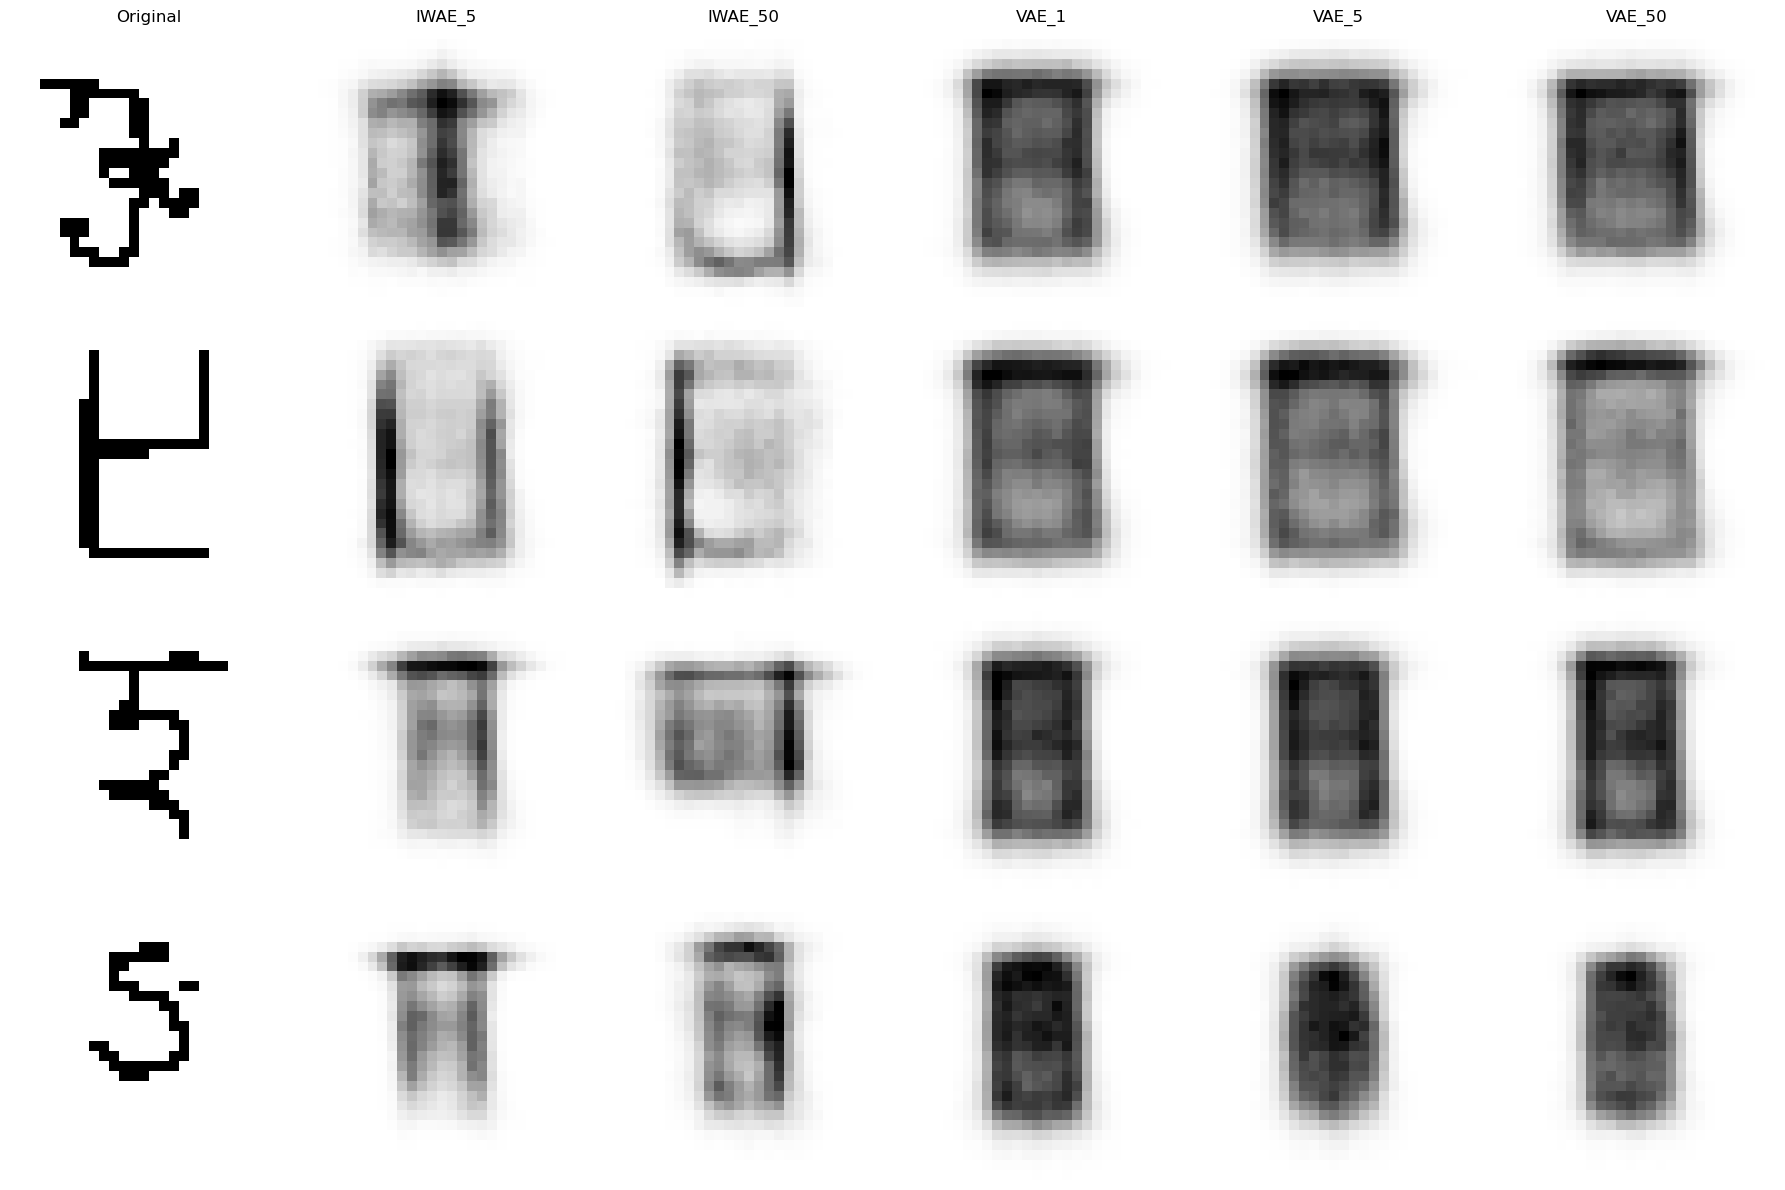

In [36]:
models = {
    "Original": None,  # Placeholder for the original sample
    "IWAE_5": iwae_5,
    "IWAE_50": iwae_50,
    "VAE_1": vae_1,
    "VAE_5": vae_5,
    "VAE_50": vae_50
}

# Take 4 samples from the dataset
samples = [next(iter(train_data_loader))[0] for _ in range(4)]

# Move samples to GPU and double precision
samples = [sample.cuda().double() for sample in samples]

# Create a function to compute reconstructions
def compute_reconstruction(model, sample):
    if model is None:  # Original sample
        return sample.cpu().detach().numpy().reshape(28, 28)
    else:
        with torch.no_grad():
            reconstructed = model(sample)
        return reconstructed.cpu().detach().numpy().reshape(28, 28)

# Prepare the multiplot
num_samples = len(samples)
num_models = len(models)

plt.figure(figsize=(num_models * 3, num_samples * 3))

for i, sample in enumerate(samples):
    for j, (model_name, model) in enumerate(models.items()):
        plt.subplot(num_samples, num_models, i * num_models + j + 1)
        reconstruction = compute_reconstruction(model, sample)
        plt.imshow(reconstruction, cmap='gray')
        if i == 0:
            plt.title(model_name)
        plt.axis('off')

plt.tight_layout()
plt.savefig('reconstruction_omni.png')
plt.show()


## Reconstruct MNIST on Omnimodels

In [56]:
iwae_5_small = IWAE_2(100, 50, 784)
iwae_5_small.double().cuda()
iwae_5_small.load_state_dict(torch.load("./output_omni/model/IWAE_layers_2_k_5_epoch_299_small_batch.model"))


/tmp/ipykernel_360477/2007081766.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  iwae_5_small.load_state_dict(torch.load("./output_omni/model/IWAE_layers_2_k_5_epoch_299

<All keys matched successfully>

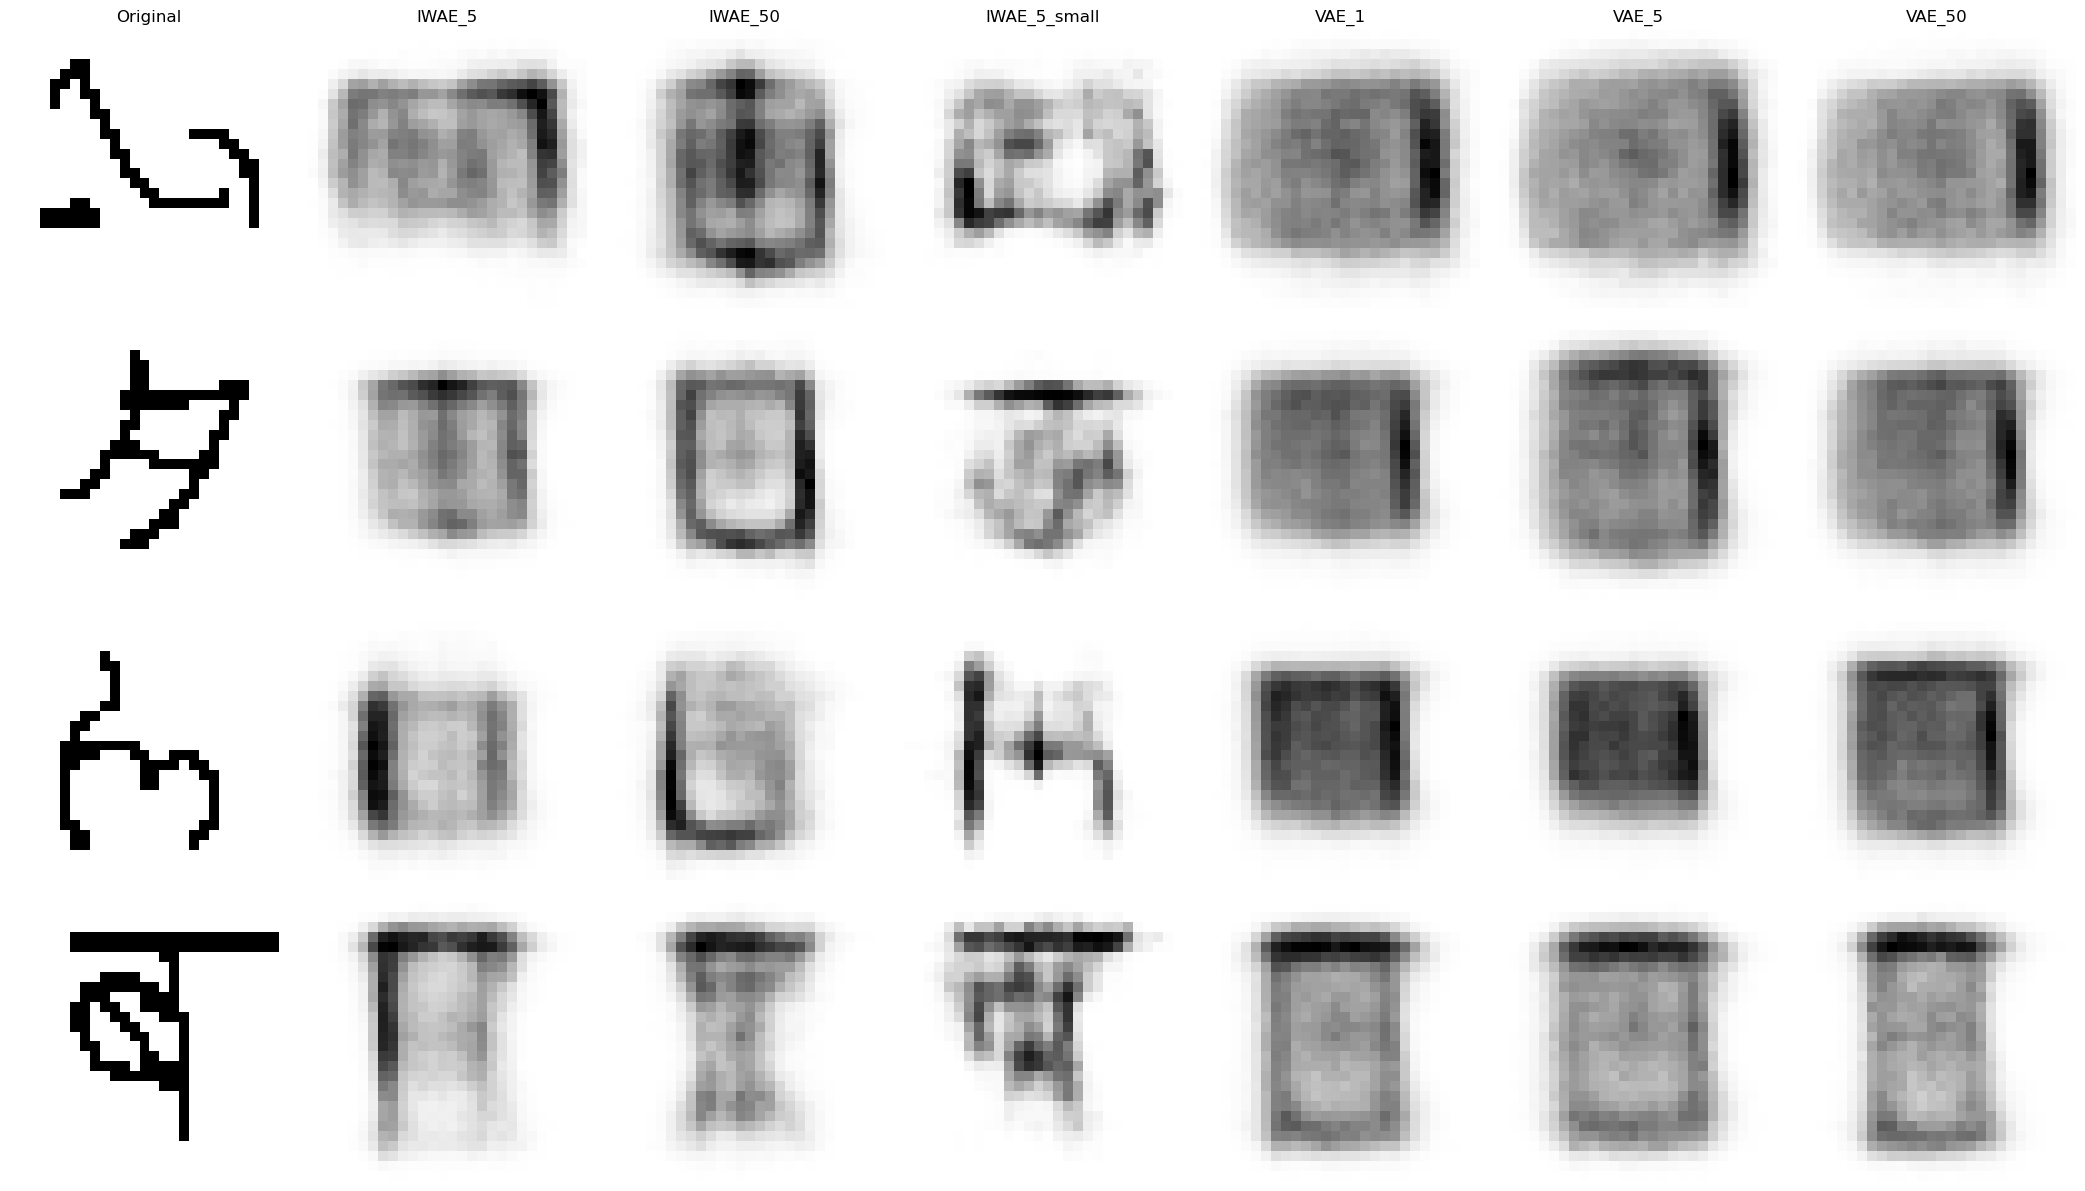

In [57]:
models = {
    "Original": None,  # Placeholder for the original sample
    "IWAE_5": iwae_5,
    "IWAE_50": iwae_50,
    "IWAE_5_small": iwae_5_small,
    "VAE_1": vae_1,
    "VAE_5": vae_5,
    "VAE_50": vae_50
}

# Take 4 samples from the dataset
samples = [next(iter(train_data_loader))[0] for _ in range(4)]

# Move samples to GPU and double precision
samples = [sample.cuda().double() for sample in samples]

# Create a function to compute reconstructions
def compute_reconstruction(model, sample):
    if model is None:  # Original sample
        return sample.cpu().detach().numpy().reshape(28, 28)
    else:
        with torch.no_grad():
            reconstructed = model(sample)
        return reconstructed.cpu().detach().numpy().reshape(28, 28)

# Prepare the multiplot
num_samples = len(samples)
num_models = len(models)

plt.figure(figsize=(num_models * 3, num_samples * 3))

for i, sample in enumerate(samples):
    for j, (model_name, model) in enumerate(models.items()):
        plt.subplot(num_samples, num_models, i * num_models + j + 1)
        reconstruction = compute_reconstruction(model, sample)
        plt.imshow(reconstruction, cmap='gray')
        if i == 0:
            plt.title(model_name)
        plt.axis('off')

plt.tight_layout()
plt.savefig('reconstruction_omni.png')
plt.show()